# Plot Kmeans clusters stored in a GeoTiff

This is a notebook plots the GeoTiffs created out of [kmeans](../stable/kmeans.ipynb). Such GeoTiffs contains the Kmeans cluster IDs.

## Dependencies

In [1]:
import sys
sys.path.append("/usr/lib/spark/python")
sys.path.append("/usr/lib/spark/python/lib/py4j-0.10.4-src.zip")
sys.path.append("/usr/lib/python3/dist-packages")

import os
os.environ["HADOOP_CONF_DIR"] = "/etc/hadoop/conf"

import os
os.environ["PYSPARK_PYTHON"] = "python3"
os.environ["PYSPARK_DRIVER_PYTHON"] = "ipython"

from pyspark.mllib.clustering import KMeans, KMeansModel 
from pyspark import SparkConf, SparkContext

from osgeo import gdal
from io import BytesIO

import matplotlib.pyplot as plt
import rasterio
from rasterio import plot
from rasterio.io import MemoryFile

## Spark Context

In [2]:
appName = "plot_kmeans_clusters"
masterURL="spark://pheno0.phenovari-utwente.surf-hosted.nl:7077"

try:
    sc.stop()
except NameError:
    print("A  new Spark Context will be created.")
    
sc = SparkContext(conf = SparkConf().setAppName(appName).setMaster(masterURL))

A  new Spark Context will be created.


## Mode of Operation setup

The user should modify the following variables to define which GeoTiffs should be loaded. In case it (s)he wants to visualize results that just came out of [kmeans](kmeans.ipnyb) laste execution, just copy the values set at its [**Mode of Operation Setup**](../stable/kmeans.ipynb#mode_of_operation_setup).

In [3]:
#GeoTiffs to be read from "hdfs:///user/hadoop/modis/"
offline_dir_path = "hdfs:///user/pheno/"
#
#Choose all and then the band or the dir which has the band extracted.
#0: Onset_Greenness_Increase
#1: Onset_Greenness_Maximum
#2: Onset_Greenness_Decrease
#3: Onset_Greenness_Minimum
#4: NBAR_EVI_Onset_Greenness_Minimum
#5: NBAR_EVI_Onset_Greenness_Maximum
#6: NBAR_EVI_Area
#7: Dynamics_QC
#
#for example:
#var geoTiff_dir = "Onset_Greenness_Increase" 
#var band_num = 0

geoTiff_dir = "kmeans_BloomFinal_LeafFinal_test" 
band_num = 3

#Satellite years between (inclusive) 1989 - 2014
#Model years between (inclusive) 1980 - 2015
first_year = 1980
last_year = 2015

#Kmeans number of iterations and clusters
numIterations = 75
minClusters = 60
maxClusters = 60
stepClusters = 1

## Mode of Operation verification

In [9]:
geotiff_hdfs_paths = []

if minClusters > maxClusters:
    maxClusters = minClusters
    stepClusters = 1

if stepClusters < 1:
    stepClusters = 1

#Satellite years between (inclusive) 1989 - 2014
#Model years between (inclusive) 1980 - 2015
years = list(range(1980,2015))
    
numClusters_id = 1
numClusters = minClusters
while numClusters <= maxClusters :
    path = offline_dir_path + geoTiff_dir + '/clusters_' + str(band_num) + '_' + str(numClusters) + '_' + str(numIterations) + '_' + str(first_year) + '_' + str(last_year) + '_' + str(years[numClusters_id]) + '.tif'
    geotiff_hdfs_paths.append(path)
    numClusters_id += 1
    numClusters += stepClusters

## Load GeoTiffs

Load the GeoTiffs into MemoryFiles.

In [10]:
clusters_dataByteArrays = []

numClusters_id = 0
numClusters = minClusters
while numClusters <= maxClusters :
    print(geotiff_hdfs_paths[numClusters_id])
    clusters_data = sc.binaryFiles(geotiff_hdfs_paths[numClusters_id]).take(1)
    clusters_dataByteArrays.append(bytearray(clusters_data[0][1]))
    numClusters_id += 1
    numClusters += stepClusters

hdfs:///user/pheno/kmeans_BloomFinal_LeafFinal_test/clusters_3_60_75_1980_2015_1981.tif


## Check GeoTiffs metadata

In [11]:
for val in clusters_dataByteArrays:
    #Create a Memory File
    memFile = MemoryFile(val).open()
    print(memFile.profile)
    memFile.close()

{'crs': CRS({'init': 'epsg:4326'}), 'compress': 'deflate', 'transform': Affine(0.008983152841195215, 0.0, -126.30312894720473,
       0.0, -0.008983152841195215, 49.25462702827337), 'tiled': False, 'width': 7808, 'height': 3892, 'nodata': nan, 'interleave': 'band', 'dtype': 'float64', 'count': 1, 'driver': 'GTiff'}


## Plot GeoTiffs

Plot for 60 clusters!!!


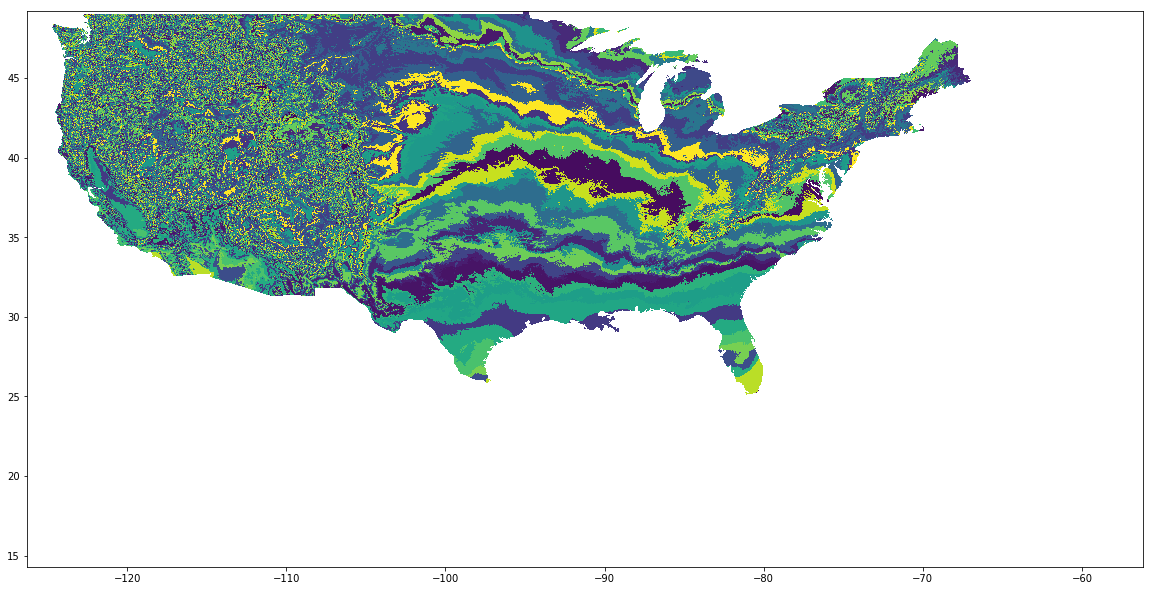

In [12]:
%matplotlib inline

numClusters_id = 0
numClusters = minClusters


while numClusters <= maxClusters :
    print ("Plot for " + str(numClusters) + " clusters!!!")
    memFile = MemoryFile(clusters_dataByteArrays[numClusters_id]).open()
    
    plt = plot.get_plt()
    plt.figure(figsize=(20,20))
    plot.show((memFile,1))
    if (numClusters < maxClusters) :
        _ = input("Press [enter] to continue.")
    memFile.close()
    numClusters_id += 1
    numClusters += stepClusters


### Histogram

Plot for 60 clusters!!!


/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


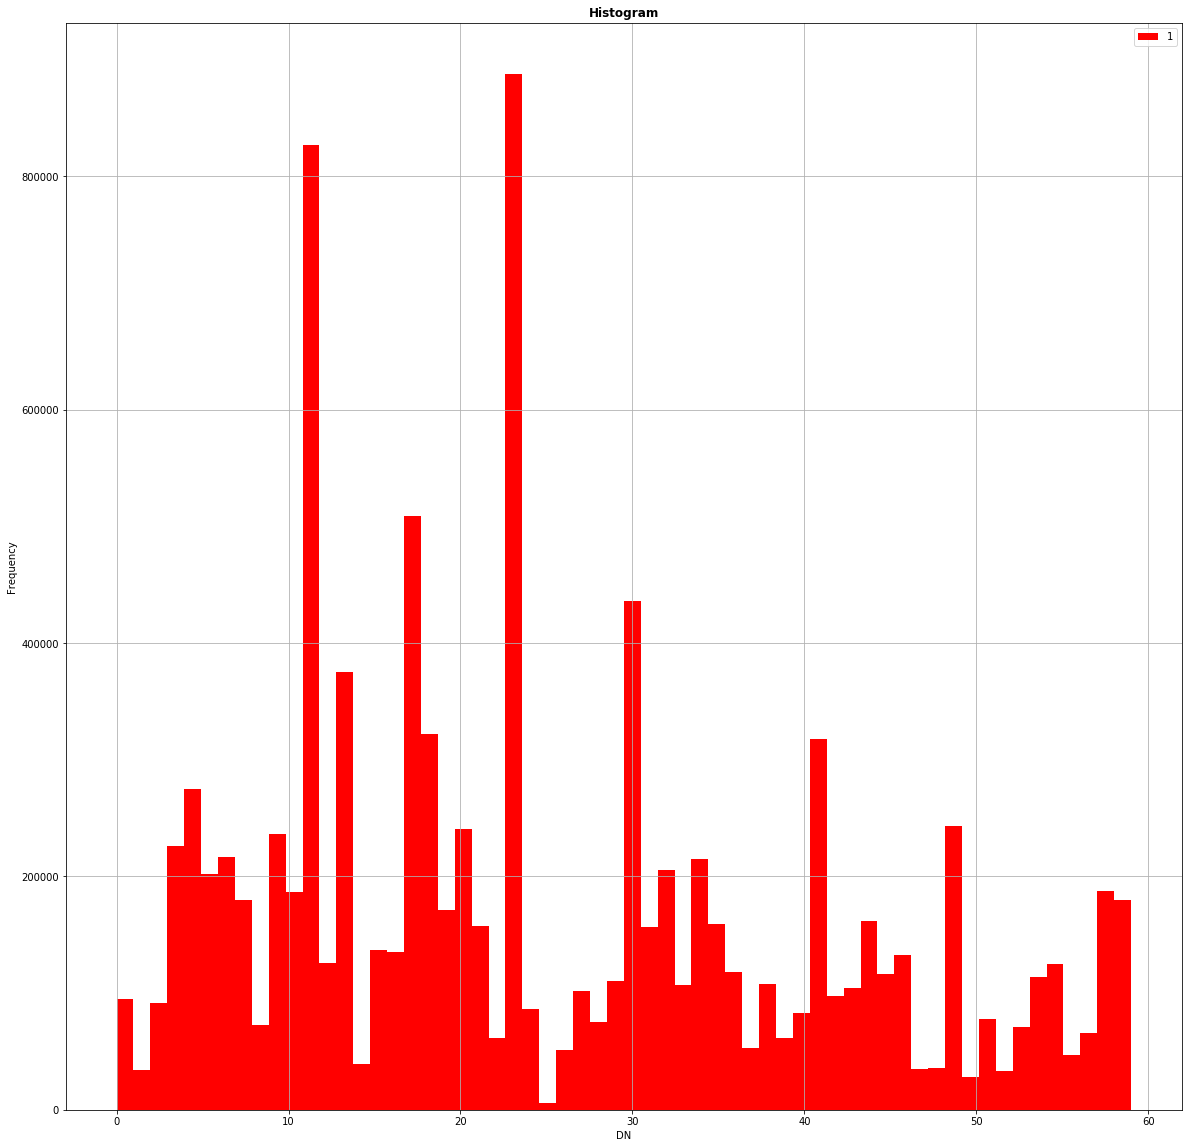

In [8]:
%matplotlib inline

numClusters_id = 0
numClusters = minClusters


while numClusters <= maxClusters :
    print ("Plot for " + str(numClusters) + " clusters!!!")
    memFile = MemoryFile(clusters_dataByteArrays[numClusters_id]).open()
    
    plt = plot.get_plt()
    plt.figure(figsize=(20,20))
    plot.show_hist(memFile, bins=numClusters)
    if (numClusters < maxClusters) :
        _ = input("Press [enter] to continue.")
    memFile.close()
    numClusters_id += 1
    numClusters += stepClusters


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


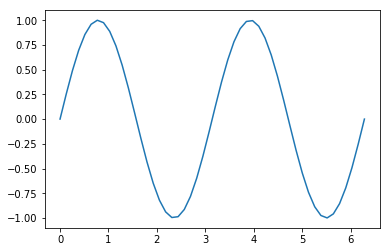

In [3]:
from ipywidgets import interactive

def wave(i):
    x = np.linspace(0, np.pi * 2)
    y = np.sin(x * i)
    plt.plot(x,y)
    plt.show()

interactive_plot = interactive(wave, i=(1,3))
interactive_plot

In [7]:
import ipywidgets
ipywidgets.__version__

'7.0.0'